# NumPy Basics: Arrays and Vectorized Computation

## NumPy基礎：矩陣與向量計算

NumPy是高效能科學計算數據分析的基礎函式庫，也是本書所介紹所有的高級工具的建構基礎，其部分功能如下:

* ndarray 具有向量計算與複雜的廣播功能(?!)快速且節省空間的多維陣列
* 可對於整組數據做快速計算，不須迴圈
* 讀寫檔案，與操作記憶體內檔案的工具
* 線性代數 亂數 傅立葉轉換功能
* 用C、C++、fortran編寫的工具

In [1]:
#繪圖顯示在ipython之中
%matplotlib inline

In [2]:
#匯入套件
from __future__ import division
from numpy.random import randn
import numpy as np
np.set_printoptions(precision=5, suppress=True)

## The NumPy ndarray: a multidimensional array object

### 多維度的陣列物件，物件內item必須為相同型態

In [3]:
#產生一個2x3的亂數陣列
data = randn(2, 3)
print(data)

[[ 2.98829  0.72931  1.45757]
 [-0.0437   1.85491 -0.70462]]


In [4]:
print(data * 10)
print(data + data)

[[ 29.88289   7.29314  14.57571]
 [ -0.437    18.54913  -7.0462 ]]
[[ 5.97658  1.45863  2.91514]
 [-0.0874   3.70983 -1.40924]]


In [5]:
#顯示維度與型態
print(data.shape)
print(data.dtype)

(2, 3)
float64


### Creating ndarrays
#### 建立陣列物件

In [6]:
#建立一維陣列
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

In [7]:
#建立二維陣列
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
print(arr2)
print(arr2.ndim)
print(arr2.shape)

[[1 2 3 4]
 [5 6 7 8]]
2
(2, 4)


In [8]:
#會自動判斷最適合的型別
print(arr1.dtype)
print(arr2.dtype)

float64
int32


In [9]:
print('一維0矩陣')
print(np.zeros(10))
print('二維0矩陣')
print(np.zeros((3, 6)))
print('三維空矩陣')
print(np.empty((2, 3, 4)))

一維0矩陣
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
二維0矩陣
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
三維空矩陣
[[[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]]


In [10]:
print(np.arange(15))
print(np.arange(0, 10, 0.5))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5]


|函數名稱|說明|
|--|--|
|array|將輸入數據轉換成ndarray，預設值接複製輸入數字|
|asarray|將輸入數據轉換成ndarray，如果輸入本身就是ndarray就不進行複製|
|arange|類似內建的range，但是是ndarray物件不是list|
|ones|產生皆為1的陣列|
|zeros|產生皆為0的陣列|
|empty|產生空陣列|
|eye、identity|產生單元矩陣|

### Data Types for ndarrays
#### ndarray的數據類型

|類型|類型代碼|說明|
|--|--|--|
|int8, uint8|i1, u1|有正負和無正負的8位整數|
|int16, uint16|i2, u2|有正負和無正負的16位整數|
|int32, uint32|i4, u4|有正負和無正負的32位整數|
|int64, uint64|i8, u8|有正負和無正負的64位整數|
|float16|f2|半精度浮點數|
|float32|f4 or f|標準單精度浮點數|
|float64|f8 or d|標準雙精度浮點數|
|float128|f16 or g|擴展精度浮點數|
|complex64, complex128, complex256|c8, c16, c32|複數|
|bool|?|True與False|
|object|O|Python的物件|
|string\_|S|固定長度的字串，如S10表示10個字節的文字|
|unicode\_|U|固定長度的unicode類型，如U10表示10個字節的文字|


In [11]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)

float64
int32


In [12]:
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)
float_arr = arr.astype(np.float64)
print(float_arr.dtype)

int32
float64


In [13]:
#強迫轉換浮點數至整數，則小數部分捨去
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [14]:
#轉換文字至浮點數
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([  1.25,  -9.6 ,  42.  ])

In [15]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [16]:
#使用代碼宣告類型
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=uint32)

### Operations between arrays and scalars
#### 矩陣之間的運算

只要維度與大小相同的矩陣，任何運算皆會直接套用至每一個元素

In [17]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print(arr)
print('平方')
print(arr * arr)
print('相減')
print(arr - arr)

[[ 1.  2.  3.]
 [ 4.  5.  6.]]
平方
[[  1.   4.   9.]
 [ 16.  25.  36.]]
相減
[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [18]:
print('倒數')
print(1 / arr)
print('開根號')
print(arr ** 0.5)

倒數
[[ 1.       0.5      0.33333]
 [ 0.25     0.2      0.16667]]
開根號
[[ 1.       1.41421  1.73205]
 [ 2.       2.23607  2.44949]]


### Basic indexing and slicing
#### 矩陣索引與拆解

In [19]:
arr = np.arange(10)
print(arr)
print(arr[5])
print(arr[5:8])

# 廣播用法，範圍內皆取代
arr[5:8] = 12
print(arr)

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]


In [20]:
#傳址，原始數據會受影響
arr_slice = arr[5:8]
arr_slice[1] = 12345
print(arr)
arr_slice[:] = 64
print(arr)

[    0     1     2     3     4    12 12345    12     8     9]
[ 0  1  2  3  4 64 64 64  8  9]


矩陣數據排列方式
![ss](http://i.imgur.com/ORBaVai.png)

In [21]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d)
print(arr2d[2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[7 8 9]


In [22]:
print(arr2d[0][2])
print(arr2d[0, 2]) #結果同上

3
3


In [23]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [24]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [25]:
old_values = arr3d[0].copy() #傳值
#改變原始數據
arr3d[0] = 42
print(arr3d)

print('=====================')
#把剛剛copy的數據放回去，可以證明copy傳值不傳址
arr3d[0] = old_values
print(arr3d)

[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [26]:
arr3d[1, 0]

array([7, 8, 9])

#### Indexing with slices
#### 索引用法，與原生list差不多

In [27]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [28]:
print(arr2d)
print(arr2d[:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]


In [29]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [30]:
print(arr2d[1, :2])
print(arr2d[2, :1])

[4 5]
[7]


In [31]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [32]:
arr2d[:2, 1:] = 0
print(arr2d)

[[1 0 0]
 [4 0 0]
 [7 8 9]]


### Boolean indexing
#### 布林值索引

In [33]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = randn(7, 4)

print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[ 0.45596 -2.19145  1.34704 -1.25275]
 [ 0.05147 -0.74007 -0.49848  0.06695]
 [ 0.06981 -1.23738  2.38267  1.11345]
 [-0.92046 -0.6297  -1.88493  0.90347]
 [ 0.70038  1.7753   0.12592 -0.67528]
 [-0.67421 -0.20039  1.3226   0.1732 ]
 [-0.2539  -0.60993 -0.20337 -1.32961]]


In [34]:
#判斷哪幾項為Bob
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [35]:
#利用bool來塞選舉陣
data[names == 'Bob']

array([[ 0.45596, -2.19145,  1.34704, -1.25275],
       [-0.92046, -0.6297 , -1.88493,  0.90347]])

In [36]:
#可再配合slices指定範圍
print(data[names == 'Bob', 2:])
print(data[names == 'Bob', 3])

[[ 1.34704 -1.25275]
 [-1.88493  0.90347]]
[-1.25275  0.90347]


In [37]:
#可用!=找到相反的，或是~取得相反結果
print(names != 'Bob')
data[~(names == 'Bob')]

[False  True  True False  True  True  True]


array([[ 0.05147, -0.74007, -0.49848,  0.06695],
       [ 0.06981, -1.23738,  2.38267,  1.11345],
       [ 0.70038,  1.7753 ,  0.12592, -0.67528],
       [-0.67421, -0.20039,  1.3226 ,  0.1732 ],
       [-0.2539 , -0.60993, -0.20337, -1.32961]])

In [38]:
#使用or選取多個條件
mask = (names == 'Bob') | (names == 'Will')
print(mask)
data[mask]

[ True False  True  True  True False False]


array([[ 0.45596, -2.19145,  1.34704, -1.25275],
       [ 0.06981, -1.23738,  2.38267,  1.11345],
       [-0.92046, -0.6297 , -1.88493,  0.90347],
       [ 0.70038,  1.7753 ,  0.12592, -0.67528]])

In [39]:
#使用數字篩選
data[data < 0] = 0
data

array([[ 0.45596,  0.     ,  1.34704,  0.     ],
       [ 0.05147,  0.     ,  0.     ,  0.06695],
       [ 0.06981,  0.     ,  2.38267,  1.11345],
       [ 0.     ,  0.     ,  0.     ,  0.90347],
       [ 0.70038,  1.7753 ,  0.12592,  0.     ],
       [ 0.     ,  0.     ,  1.3226 ,  0.1732 ],
       [ 0.     ,  0.     ,  0.     ,  0.     ]])

In [40]:
#使用文字篩選
data[names != 'Joe'] = 7
data

array([[ 7.     ,  7.     ,  7.     ,  7.     ],
       [ 0.05147,  0.     ,  0.     ,  0.06695],
       [ 7.     ,  7.     ,  7.     ,  7.     ],
       [ 7.     ,  7.     ,  7.     ,  7.     ],
       [ 7.     ,  7.     ,  7.     ,  7.     ],
       [ 0.     ,  0.     ,  1.3226 ,  0.1732 ],
       [ 0.     ,  0.     ,  0.     ,  0.     ]])

### Fancy indexing
#### 花式索引

In [41]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [42]:
#可根據索引重新排列陣列
arr[[4, 3, 0, 6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [43]:
#負數表示從後面數過來
arr[[-3, -5, -7]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

In [44]:
# more on reshape in Chapter 12
arr = np.arange(32).reshape((8, 4))
print(arr)

#取得此索引位置的值，重新排成矩陣(1,0) (5,3) (7,1) (2,2)
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


array([ 4, 23, 29, 10])

In [45]:
#取得特定行，並重新排列每一行元素位置
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [46]:
#結果同上，轉換兩個亦為矩陣成選取區域
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### Transposing arrays and swapping axes
#### 轉置與軸對換

In [47]:
arr = np.arange(15).reshape((3, 5))
print(arr)
arr.T

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [48]:
arr = np.random.randn(6, 3)
print(arr)
np.dot(arr.T, arr)

[[-2.22774 -0.83877 -0.98219]
 [ 0.83854  1.00398  1.28662]
 [ 0.06334  1.68866 -1.61224]
 [ 0.03737  1.25732  0.72706]
 [-1.40697  1.45471  0.78436]
 [ 0.50908  2.27532 -1.40946]]


array([[  7.91013,   1.97597,   1.37089],
       [  1.97597,  13.4372 ,  -1.75877],
       [  1.37089,  -1.75877,   8.34984]])

In [49]:
#高維度軸轉換
arr = np.arange(24).reshape((2, 3, 4))
print(arr)
arr.transpose((2, 1, 0))

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

In [50]:
#swapaxes可輸入欲兌換之軸
print(arr)
print(arr.swapaxes(0, 2))
#原始數據不會受改變
arr

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
[[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]]


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## Universal Functions: Fast element-wise array functions
### 通用函數 快速的元素級矩陣函數

In [51]:
arr = np.arange(10)
print(arr)
print(np.sqrt(arr))
np.exp(arr)

[0 1 2 3 4 5 6 7 8 9]
[ 0.       1.       1.41421  1.73205  2.       2.23607  2.44949  2.64575
  2.82843  3.     ]


array([    1.     ,     2.71828,     7.38906,    20.08554,    54.59815,
         148.41316,   403.42879,  1096.63316,  2980.95799,  8103.08393])

In [52]:
x = randn(8)
y = randn(8)
z = randn(8)
print(x)
print(y)
print(z)
#分別找出每一組比對值中的最大值
np.maximum(x, y, z) # element-wise maximum

[-0.29482 -2.15941 -0.22721 -0.66515 -0.21226  0.29621  0.82413 -1.09335]
[-0.24271  0.09651 -0.0834   1.1159  -0.30491  0.3613   0.4902  -2.07611]
[ 0.61005 -0.45614  0.76748  0.88064  1.23767  0.94327  0.74656  0.08846]


array([-0.24271,  0.09651, -0.0834 ,  1.1159 , -0.21226,  0.3613 ,
        0.82413, -1.09335])

In [53]:
arr = randn(7) * 5
print(arr)
np.modf(arr)

[  7.4986   -1.64742   7.86312  -3.35752 -11.65145   2.36109  -0.87734]


(array([ 0.4986 , -0.64742,  0.86312, -0.35752, -0.65145,  0.36109, -0.87734]),
 array([  7.,  -1.,   7.,  -3., -11.,   2.,  -0.]))

#### 一元ufunc

|函式|說明|
|----|-----|
|abs, fabs|整數與浮點數的絕對值，對於非複數fabs更快|
|sqrt|開根號，如同 arr \*\* 0.5|
|square|平方，如同 arr \*\* 2|
|exp|指數|
|log, log10, log2, log1p|自然對數 底數為10 底數為2 底數為(1+x)|
|sign|取得正負號 1 (正), 0 (零), or -1 (負)|
|ceil|計算ceiling值，進位到整數|
|floor|捨棄到整數|
|rint|四捨五入，保留dtype不變|
|modf|取得整數與小數部分|
|isnan|判斷是否為NaN值，回傳bool陣列|
|isfinite, isinf|判斷是否為inf，回傳bool陣列|
|cos, cosh, sin, sinh,tan, tanh|三角函數|
|arccos, arccosh, arcsin, arcsinh, arctan, arctanh|反三角函數|
|logical_not|計算not x的值，相當於-arr|

#### 二元ufunc

|函式|說明|
|----|-----|
|add|相加|
|subtrat|input一減input二|
|multiply|相乘|
|divide, floor_divide|除法與整數除法|
|power|指數|
|maximum, fmax|同一位置最大值，fmax忽略NaN|
|minimum, fmin|同一位置最小值，fmax忽略NaN|
|mod|餘數|
|copysign|將第二組數據的符號複製給第一組|
|greater, greater_equal,less, less_equal, equal,not_equal|運算比較，產生bool陣列|
|logical_and, logical_or, logical_xor|邏輯運算|


## Data processing using arrays
### 利用陣列處理數據

In [54]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [55]:
from matplotlib.pyplot import imshow, title

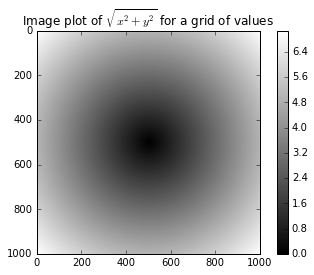

In [56]:
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys ** 2)
z
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar();
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values");
#plt.draw();

### Expressing conditional logic as array operations
#### 條件邏輯轉換陣列運算

In [57]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [58]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

In [59]:
result = np.where(cond, xarr, yarr)
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [60]:
arr = randn(4, 4)
print(arr)
print(np.where(arr > 0, 2, -2))
np.where(arr > 0, 2, arr) # set only positive values to 2

[[-2.07968  0.03495 -0.20214 -1.40846]
 [-0.17134 -1.49503 -2.56049 -0.48046]
 [ 1.02567  0.58481 -2.10006 -2.02685]
 [-1.09705 -0.63854 -0.26247 -0.70728]]
[[-2  2 -2 -2]
 [-2 -2 -2 -2]
 [ 2  2 -2 -2]
 [-2 -2 -2 -2]]


array([[-2.07968,  2.     , -0.20214, -1.40846],
       [-0.17134, -1.49503, -2.56049, -0.48046],
       [ 2.     ,  2.     , -2.10006, -2.02685],
       [-1.09705, -0.63854, -0.26247, -0.70728]])

In [61]:
cond1 = np.random.randn(10)
cond2 = np.random.randn(10)
cond1 = cond1 > 0
cond2 = cond2 > 0
print(cond1)
print(cond2)

result = []
for i in range(10):
    if cond1[i] and cond2[i]:
        result.append(0)
    elif cond1[i]:
        result.append(1)
    elif cond2[i]:
        result.append(2)
    else:
        result.append(3)

print(result)

[False  True False  True  True  True False False False  True]
[ True  True False False  True False False False False  True]
[2, 0, 3, 1, 0, 1, 3, 3, 3, 0]


In [62]:
np.where(cond1 & cond2, 0,
         np.where(cond1, 1,
                  np.where(cond2, 2, 3)))

array([2, 0, 3, 1, 0, 1, 3, 3, 3, 0])

In [63]:
result = 1 * cond1 + 2 * cond2 + 3 * ~(cond1 | cond2)
result

array([2, 3, 3, 1, 3, 1, 3, 3, 3, 3])

### Mathematical and statistical methods
#### 數學與統計方法

In [64]:
arr = np.random.randn(5, 4) # normally-distributed data
print(arr)
print(arr.mean())
print(np.mean(arr)) #同上
arr.sum()

[[-2.69685 -1.52012 -0.36458 -0.52032]
 [-0.73658  0.61348 -1.42092  0.97024]
 [-0.63968  0.28895 -0.74882 -0.12685]
 [-0.71507  2.00792  2.31128  1.18696]
 [ 0.64832 -1.77811  0.8651   0.66944]]
-0.085311455897
-0.085311455897


-1.7062291179390294

In [65]:
#可針對特定維度做計算
print(arr.mean(axis=1))
arr.sum(0)

[-1.27547 -0.14345 -0.3066   1.19777  0.10119]


array([-4.13987, -0.38788,  0.64205,  2.17946])

In [66]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(arr)
#產生sum計算中間過程
print(arr.cumsum(0))

#產生相乘計算中間過程
arr.cumprod(1)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]


array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

In [67]:
#太陽日計算
arr = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
print(arr.cumsum(0))

[ 31  59  90 120 151 181 212 243 273 304 334 365]


|Method|說明|
|--|--|
|sum|加總，可指定軸，0長度計算為0|
|mean|平均，可指定為軸，0長度計算為NaN|
|std, var|標準差與方差，可指定自由度，預設為n|
|min, max|最大與最小|
|argmin, argmax|最大與最小的索引值|
|cumsum|累加值|
|cumprod|壘乘值|

### Methods for boolean arrays
#### bool陣列的操作

In [68]:
arr = randn(1000)
(arr > 0).sum() # T為1，F為0

492

In [69]:
bools = np.array([False, False, True, False])
print(bools.any()) #只要有一個是True就是True
bools.all()        #檢查全部是不是True

True


False

### Sorting
#### 排序

In [70]:
arr = randn(8)
print(arr)
arr.sort()
print(arr)

[ 0.34324 -0.96372 -0.98959  0.01402  1.06567  0.07311  0.80612  0.24588]
[-0.98959 -0.96372  0.01402  0.07311  0.24588  0.34324  0.80612  1.06567]


In [71]:
arr = randn(5, 3)
print(arr)
arr.sort(1)
print(arr)

[[-1.16624 -0.32018 -2.43044]
 [ 0.14126  2.16745  0.33961]
 [ 1.46657  0.49374  0.21676]
 [-1.2672   0.59241  0.55093]
 [-0.53309 -0.88633  0.29597]]
[[-2.43044 -1.16624 -0.32018]
 [ 0.14126  0.33961  2.16745]
 [ 0.21676  0.49374  1.46657]
 [-1.2672   0.55093  0.59241]
 [-0.88633 -0.53309  0.29597]]


In [72]:
large_arr = randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile，取得資料前5%的值為多少

-1.5901997025931156

In [73]:
large_arr = randn(6)

print(np.sort(large_arr)) #回傳副本
print(large_arr) #原始數據

large_arr.sort() #原始數據會改變
print(large_arr)

[-1.48316 -1.2617  -0.94497 -0.8604  -0.34013  0.11328]
[-0.34013 -1.48316 -1.2617  -0.8604   0.11328 -0.94497]
[-1.48316 -1.2617  -0.94497 -0.8604  -0.34013  0.11328]


### Unique and other set logic
#### 唯一化以及其他集合邏輯

In [74]:
#找出陣列中的不重複值，並且排序
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

['Bob' 'Joe' 'Will']


array([1, 2, 3, 4])

In [75]:
#上面同等原生語法此用法
sorted(set(names))

['Bob', 'Joe', 'Will']

In [76]:
#檢查是否在另一個陣列中，回傳bool陣列
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

|Method|Description|
|--|--|
|unique(x)|排除重複值，並排序|
|intersect1d(x, y)|計算兩者交集，並排序|
|union1d(x, y)|計算兩者聯集，並排序|
|in1d(x, y)|檢查x中的元素是否在y之中|
|setdiff1d(x, y)|移除x中y的元素|
|setxor1d(x, y)|聯集扣除交集(對稱差)|

## File input and output with arrays
### 陣列的輸出與輸入

### Storing arrays on disk in binary format
#### 儲存成二進位格式

In [77]:
arr = np.arange(10)
np.save('ch04/some_array', arr) #副檔名預設成npy

In [78]:
np.load('ch04/some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [79]:
#可將數個陣列壓縮儲存
np.savez('ch04/array_archive.npz', a=arr, b=arr)

In [80]:
#取出時採用類似字典的物件型態
arch = np.load('ch04/array_archive.npz')
arch['b']
del arch

In [81]:
!rm some_array.npy
!rm array_archive.npz

!del ch04\some_array.npy
!del ch04\array_archive.npz

'rm' 不是內部或外部命令、可執行的程式或批次檔。
'rm' 不是內部或外部命令、可執行的程式或批次檔。


### Saving and loading text files
#### 存取一般文檔

In [82]:
arr = np.loadtxt('ch04/array_ex.txt', delimiter=',')
arr

array([[ 0.58005,  0.18673,  1.04072,  1.13441],
       [ 0.19416, -0.63692, -0.93866,  0.12409],
       [-0.12641,  0.26861, -0.69572,  0.04743],
       [-1.48441,  0.00418, -0.7442 ,  0.00549],
       [ 2.30287,  0.20013,  1.67024, -1.88109],
       [-0.19323,  1.04723,  0.4828 ,  0.96033]])

## Linear algebra
### 線性代數

In [83]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x)
print(y)
x.dot(y)  # equivalently np.dot(x, y)

[[ 1.  2.  3.]
 [ 4.  5.  6.]]
[[  6.  23.]
 [ -1.   7.]
 [  8.   9.]]


array([[  28.,   64.],
       [  67.,  181.]])

In [84]:
np.dot(x, np.ones(3))

array([  6.,  15.])

In [85]:
np.random.seed(12345)

In [86]:
from numpy.linalg import inv, qr
X = randn(5, 5)
mat = X.T.dot(X)
print('原始矩陣')
print(mat)

print('計算反矩陣')
print(inv(mat))
print('自己與自己反矩陣相成，變成單元矩陣')
print(mat.dot(inv(mat)))

#QR分解，A = Q * R
q, r = qr(mat)
print('上三角矩陣')
print(r)
print('把分解的乘回去')
q.dot(r)

原始矩陣
[[  4.07499  -3.30588  -1.30731   3.44655   2.61974]
 [ -3.30588   6.15227   1.71494  -4.31933  -0.09378]
 [ -1.30731   1.71494  11.11872  -3.37024  -2.00973]
 [  3.44655  -4.31933  -3.37024   4.78118   0.03315]
 [  2.61974  -0.09378  -2.00973   0.03315   7.77365]]
計算反矩陣
[[ 3.0361  -0.18083 -0.68779 -2.82852 -1.19111]
 [-0.18083  0.50347  0.12149  0.67016  0.09557]
 [-0.68779  0.12149  0.2904   0.80814  0.30488]
 [-2.82852  0.67016  0.80814  3.41519  1.15567]
 [-1.19111  0.09557  0.30488  1.15567  0.60509]]
自己與自己反矩陣相成，變成單元矩陣
[[ 1.  0. -0.  0.  0.]
 [-0.  1.  0.  0. -0.]
 [-0.  0.  1.  0.  0.]
 [-0. -0. -0.  1.  0.]
 [-0.  0. -0. -0.  1.]]
上三角矩陣
[[ -6.92714   7.389     6.12273  -7.11625  -4.92151]
 [  0.       -3.97348  -0.86708   2.97473  -5.74024]
 [  0.        0.      -10.2681    1.8909    1.6079 ]
 [  0.        0.        0.       -1.29965   3.35772]
 [  0.        0.        0.        0.        0.55706]]
把分解的乘回去


array([[  4.07499,  -3.30588,  -1.30731,   3.44655,   2.61974],
       [ -3.30588,   6.15227,   1.71494,  -4.31933,  -0.09378],
       [ -1.30731,   1.71494,  11.11872,  -3.37024,  -2.00973],
       [  3.44655,  -4.31933,  -3.37024,   4.78118,   0.03315],
       [  2.61974,  -0.09378,  -2.00973,   0.03315,   7.77365]])

|Function|Description|
|--|--|
|diag|回傳一個方陣的對角線元素，或把一組一維陣列轉換成方陣|
|dot|矩陣乘法|
|trace|對角線元素和|
|det|矩陣行列式|
|eig|eigenvalues 與 eigenvectors|
|inv|方陣的反矩陣|
|pinv|Moore-Penrose偽反矩陣(補乘一個轉置矩陣)|
|qr|QR分解|
|svd|singular value decomposition (SVD)奇異解|
|solve|Ax = b for x|
|lstsq|y = Xb，最小二乘法|

## Random number generation
### 亂數產生器

In [87]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.12412,  0.30261,  0.52377,  0.00094],
       [ 1.34381, -0.71354, -0.83115, -2.37023],
       [-1.86076, -0.86076,  0.56015, -1.26593],
       [ 0.11983, -1.06351,  0.33288, -2.35942]])

In [88]:
#原生亂數與numpy的效能評估，皆產生100萬個亂數

from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

1 loop, best of 3: 1.02 s per loop
10 loops, best of 3: 49.8 ms per loop


|Function|Description|
|--|--|
|seed|亂數種子|
|permutation|返回一個隨機排列的序列，或是返回一個隨機數列的範圍|
|shuffle|對一個序列就地隨機排序|
|rand|產生均勻分布的樣本值|
|randint|給定上下界範圍內隨機取整數值|
|randn|產生常態分布(平均為0,標準差為1)的樣本值|
|binomial|產生二項分佈(Binomial Distribution的樣本值|
|normal|產生高斯分布的樣本值|
|beta|產生Beta分佈(beta distribution)的樣本值|
|chisquare|產生卡方分布（chi-square distribution的樣本值|
|gamma|產生gamma分佈(gamma distribution)的樣本值|
|uniform|產生在[0, 1)中均勻分布的樣本值|

## Example: Random Walks
### 隨機散步

通過模擬隨機散步來說明如何運用矩陣運算，  
從0開始，步伐1和-1出現的機率相等

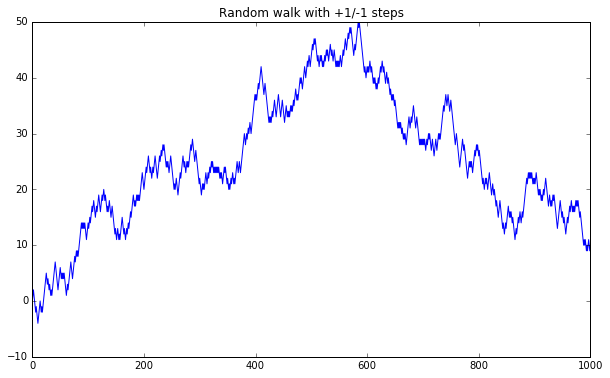

In [89]:
#採用內建的random來產生1000步的隨機散步

import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

plt.rc('figure', figsize=(10, 6))
plt.plot(range(steps + 1), walk)
plt.title('Random walk with +1/-1 steps');

In [90]:
#採用numpy做計算

#隨意設定亂數種子
np.random.seed(12345)

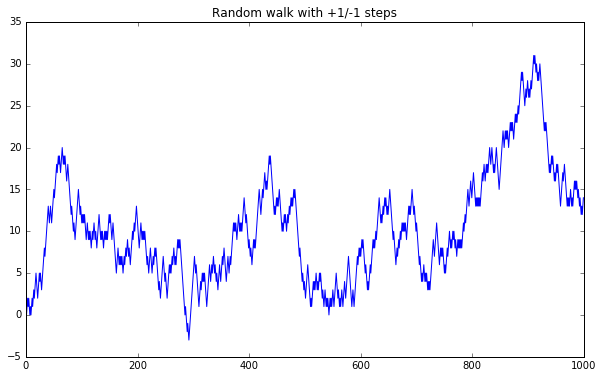

In [91]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)

steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

plt.plot(range(nsteps), walk)
plt.title('Random walk with +1/-1 steps');

In [92]:
#找出走到最兩邊最遠的距離
print(walk.min())
print(walk.max())

-3
31


In [93]:
#找出第一次距離原點為10的時候
(np.abs(walk) >= 10).argmax()

37

### Simulating many random walks at once
#### 一次模擬多個隨機散步

In [94]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ..., 
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]], dtype=int32)

In [95]:
print(walks.max())
print(walks.min())

138
-133


In [96]:
#找出到達距離原點30單位的組別
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

3410

In [97]:
#其平均到達30的平均次數
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.88973607038122

In [98]:
#也可以用其他亂數分布種類完成相同事情
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))
steps

array([[-0.02566,  0.36311,  0.4172 , ...,  0.15727, -0.16257,  0.05424],
       [-0.10456,  0.07878,  0.1911 , ...,  0.07679, -0.18546,  0.03332],
       [-0.16729,  0.12035, -0.30427, ..., -0.30982, -0.17292,  0.02772],
       ..., 
       [ 0.27987,  0.05478, -0.02167, ...,  0.02795,  0.25268,  0.06511],
       [ 0.31854, -0.1511 , -0.11214, ...,  0.14706,  0.18207, -0.02473],
       [-0.13102, -0.24008, -0.03925, ..., -0.18321, -0.20967,  0.20706]])